**Combined EDA**

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

from folium import Choropleth
import geopandas as gpd
from shapely.geometry import shape
from branca.colormap import linear
# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

*Import the budget and bike theft data to visualize yearly trends.*

In [3]:
budget_data = pd.read_csv('Data\Budget_by_Command.csv')

In [6]:
bike_data = pd.read_csv('Data\Bicycle_Thefts_Open_Data.csv')
#create year column for merging
bike_data['REPORT_DATE'] = pd.to_datetime(bike_data['REPORT_DATE'])
bike_data['year'] = bike_data['REPORT_DATE'].dt.year

In [7]:
approved_budget = budget_data[
    (budget_data['Command'] == 'Community Safety Command') &
    (budget_data['Type of Metric'] == 'Approved Budget')
]

#create a list which excludes 'Revenue' from the category of budget allocation
positive_categories = ['Equipment', 'Salaries', 'Materials & Supplies', 'Services',
                       'Benefits', 'Premium Pay']
approved_budget = approved_budget[approved_budget['Category'].isin(positive_categories)]

#groupby year and sum the budget Amount across all years available
total_budget_per_year = approved_budget.groupby('Year')['Amount'].sum().reset_index()

#same step for bike thefts, but use size() to sum individual reports across all years.
bike_thefts_per_year = bike_data.groupby('year').size().reset_index(name='Theft_Count')

#merge the two datasets on 'Year'
merged_data = pd.merge(total_budget_per_year, bike_thefts_per_year, left_on='Year', right_on='year')

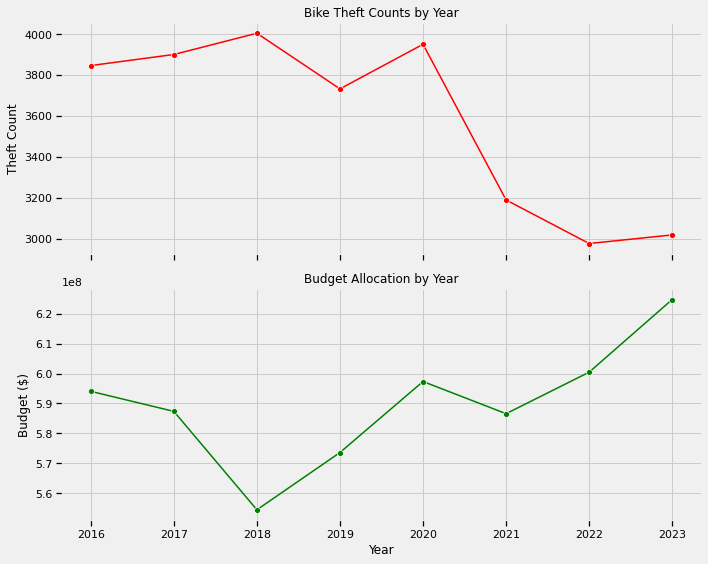

In [8]:
#now lets plot a stacked lineplot to see the trend/relationship between TPS budget and theft

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

#plot the bike theft first
sns.lineplot(data=merged_data, x='year', y='Theft_Count',ax=axes[0], marker='o', color='r')
axes[0].set_title('Bike Theft Counts by Year')
axes[0].set_ylabel('Theft Count')
axes[0].grid(True)

#then, plot the budget
sns.lineplot(x='year', y='Amount', data=merged_data, ax=axes[1], marker='o', color='g')
axes[1].set_title('Budget Allocation by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Budget ($)')
axes[1].grid(True)

plt.tight_layout()
plt.show()